# Statistics

## Describing a dataset

In [76]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

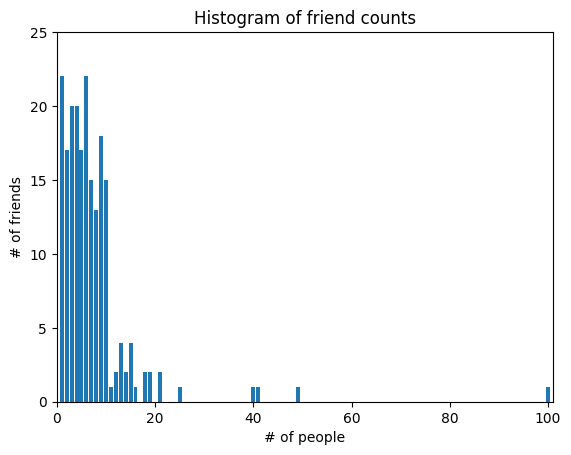

In [77]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of friend counts")
plt.xlabel("# of people")
plt.ylabel("# of friends")
plt.plot()
plt.show()

In [78]:
num_points = len(num_friends)
num_points

204

In [79]:
largest_value = max(num_friends)
lowest_value = min(num_friends)

largest_value, lowest_value

(100.0, 1)

### Central tendencies

#### Mean / Average

In [80]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

mean(num_friends)

7.333333333333333

#### Median 

 The underscores indicate that these are "private" functions, as they're intended to be called by our median function but not by other people using our statistics library.

In [81]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

In [82]:
def _median_even(xs: List[float])-> float:
    """If len(xs) is odd, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [83]:
def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return  _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 6,8]) == 6
assert median([2,4,6,8]) == (4 + 6) / 2

In [84]:
median(num_friends)

6.0

#### Quantile

A generalization of the median is the quantile, which represents the value under
which a certain percentile of the data lies (the median represents the value under
which 50% of the data lies)

In [85]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index  = int(p * len(xs))
    # print(f'index {p_index} is {p * 100} % of {len(xs)}, original list lenght')
    return sorted(xs)[p_index]

quantile(num_friends, 0.5)

6

#### Mode

Most frequent value

In [86]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[6, 1]

### Dispersion
Dispersion refers to measures of how spread out our data is. Typically they’re statistics
for which values near zero signify not spread out at all and for which large values
(whatever that means) signify very spread out. 

#### Range
For instance, a very simple measure is the range, which is just the difference between the largest and smallest elements:

In [87]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) ==  99

#### Variance

In [88]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [89]:
import sys
sys.path.append('/home/borges/dev/studies/ds-scratch/math')  # Adjust the path as needed
from linear_algebra import sum_of_squares

def variance(xs: List[float]) -> List[float] :
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "Variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n  - 1)

variance(num_friends)

81.54351395730706

#### Standard deviation std



In [90]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

9.030144736232474

#### Interquartile range IQR

Both the range and the standard deviation have the same outlier problem that we saw
earlier for the mean.

A more robust alternative computes the difference between the 75th percentile value
and the 25th percentile value, which is quite plainly unaffected by a small number of outliers.

In [91]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range(num_friends)

6

### 

## Correlation

### Covariance

We’ll first look at covariance, the paired analogue of variance. Whereas variance
measures how a single variable deviates from its mean, covariance measures how two
variables vary in tandem from their mean

In [92]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

In [93]:
from linear_algebra import dot, Vector

def covariance(xs: Vector, ys: Vector) -> float:
    assert len(xs) == len(ys), "xs and ys should be same lenght"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

### Correlation

The correlation is unitless and always lies between –1 (perfect anticorrelation) and
1 (perfect correlation). A number like 0.25 represents a relatively weak positive corre‐
lation.

In [94]:
def correlation(xs: Vector, ys: Vector) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)

    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x/ stdev_y
    else:
        return 0
    
correlation(num_friends, daily_minutes), correlation(num_friends, daily_hours)

(0.24736957366478227, 0.24736957366478227)

0.24736957366478227

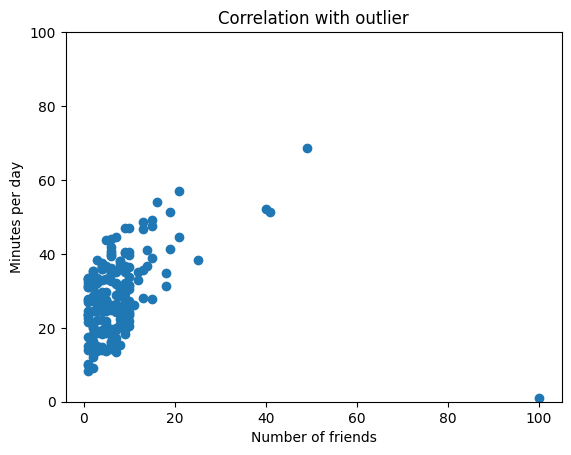

In [95]:
# however there are outliers in the dataset, witou them the correlation may be stronger or weaker.
plt.scatter(num_friends, daily_minutes)
plt.ylabel("Minutes per day")
plt.xlabel("Number of friends")
plt.title("Correlation with outlier")
plt.ylim(0, 100)

correlation(num_friends, daily_minutes)

204 204


0.24736957366478227

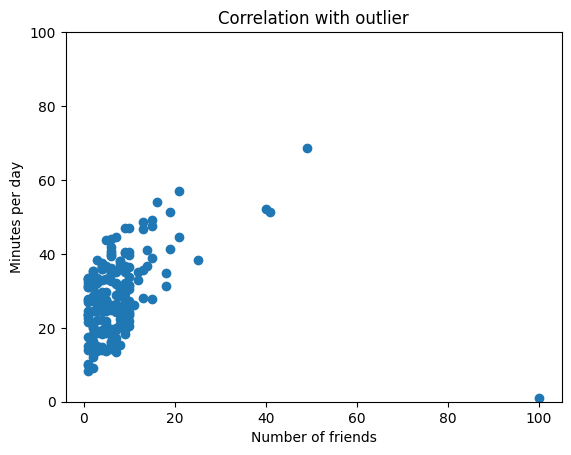

In [ ]:
# however there are outliers in the dataset, witou them the correlation may be stronger or weaker.
plt.scatter(num_friends, daily_minutes)
plt.ylabel("Minutes per day")
plt.xlabel("Number of friends")
plt.title("Correlation with outlier")
plt.ylim(0, 100)


correlation(num_friends, daily_minutes)

0.5736792115665601

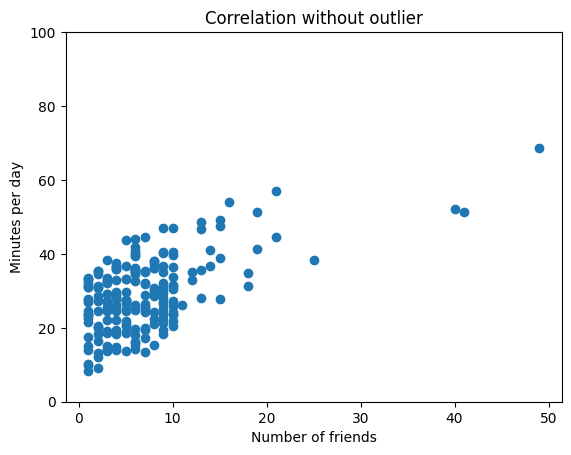

In [98]:
outlier =  num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

plt.scatter(num_friends_good, daily_minutes_good)
plt.ylabel("Minutes per day")
plt.xlabel("Number of friends")
plt.title("Correlation without outlier")
plt.ylim(0, 100)
correlation(num_friends_good, daily_minutes_good) 